### IDs:
Insert yours IDs to the cell below

ID #1:310116165

ID #2:308564293


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?

In [4]:
#preparation
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import mixture

#sns styling
sns.set_style("whitegrid")


#load Boston Dataset
warnings.filterwarnings('ignore') #ignore the loading warning
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame (data=boston_data.data, columns = boston_data.feature_names)
df['Price'] = boston_data.target

#initial analytics
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can see that the dataset a total of 14 features which includes one target feature - the price. All the features are numeric of type float64. There are 506 samples (rows) with no apparent missing values.

2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.

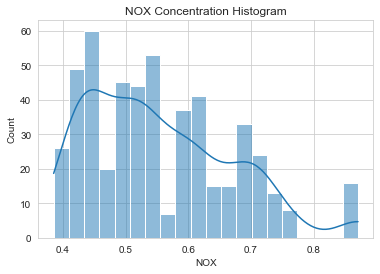

In [110]:
sns.histplot(data = df, x = "NOX", bins = 20, kde = True).set(title='NOX Concentration Histogram');

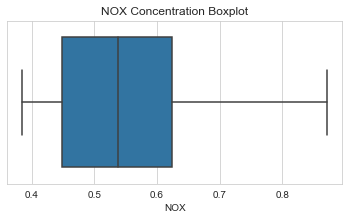

In [136]:
plt.figure(figsize= (6, 3))
sns.boxplot(data = df, x = "NOX").set(title='NOX Concentration Boxplot');

<p style="color:red;">
This distribution outline resembles log-normal ??

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with 
unusual behaviour?


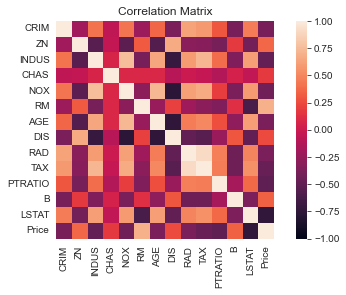

In [143]:
plt.figure(figsize=(8, 4))
boston_corr = df.corr()
sns.heatmap(boston_corr, vmin=-1, vmax=1, square = True).set(title="Correlation Matrix");

We can see that TAX and RAD have a high positive correlation of close to 1.
DIS has a high negative correlation with INDUS, NOX and AGE.

The "CHAS" (Charles River dummy variable) has a peculiar behaviour with a near constant correlation coefficient. This is a categorical variable and therefore does not correlate to the other variables.

4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 


In [217]:
#lets find the min and max correlation
min_row = boston_corr.min().idxmin()
min_col = boston_corr[min_row].idxmin()
print('The minimum correlation is:' ,boston_corr[min_row][min_col] , 'and the variables are:', min_row, min_col)

#lets find the min and max correlation
idx_no_1 = boston_corr < 1
max_row = boston_corr[idx_no_1].max().idxmax()
max_col = boston_corr[idx_no_1][max_row].idxmax()
print('The maximum correlation is:' ,boston_corr[max_row][max_col] , 'and the variables are:', max_row, max_col)

The minimum correlation is: -0.7692301132258282 and the variables are: NOX DIS
The maximum correlation is: 0.9102281885331865 and the variables are: RAD TAX


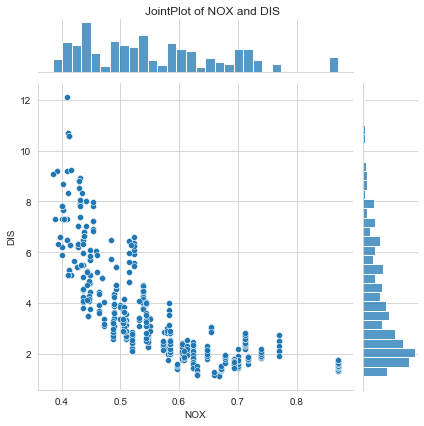

In [254]:
p = sns.jointplot(ax=ax[0], data = df, x = 'NOX', y = 'DIS', marginal_kws = dict(bins = 30));
p.fig.suptitle("JointPlot of NOX and DIS");
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

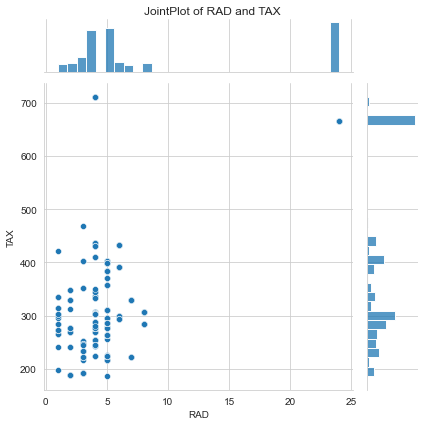

In [256]:
p = sns.jointplot(ax=ax[0], data = df, x = 'RAD', y = 'TAX', marginal_kws = dict(bins = 30));
p.fig.suptitle("JointPlot of RAD and TAX");
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

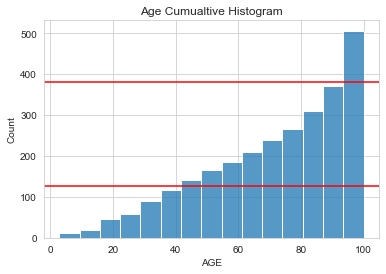

In [295]:
g = sns.histplot(data = df, x = "AGE", bins = 15, cumulative = True).set(title='Age Cumualtive Histogram');
plt.axhline(0.75*len(df.index), color='r', linestyle='-');
plt.axhline(0.25*len(df.index), color='r', linestyle='-');

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

First, let's find the features that correlate most to the price:

In [340]:
idx_largest_corr = boston_corr[idx_no_1].abs().nlargest(10,'Price').index
print(idx_largest_corr)

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN'],
      dtype='object')


Now we can look for interestring correlations:

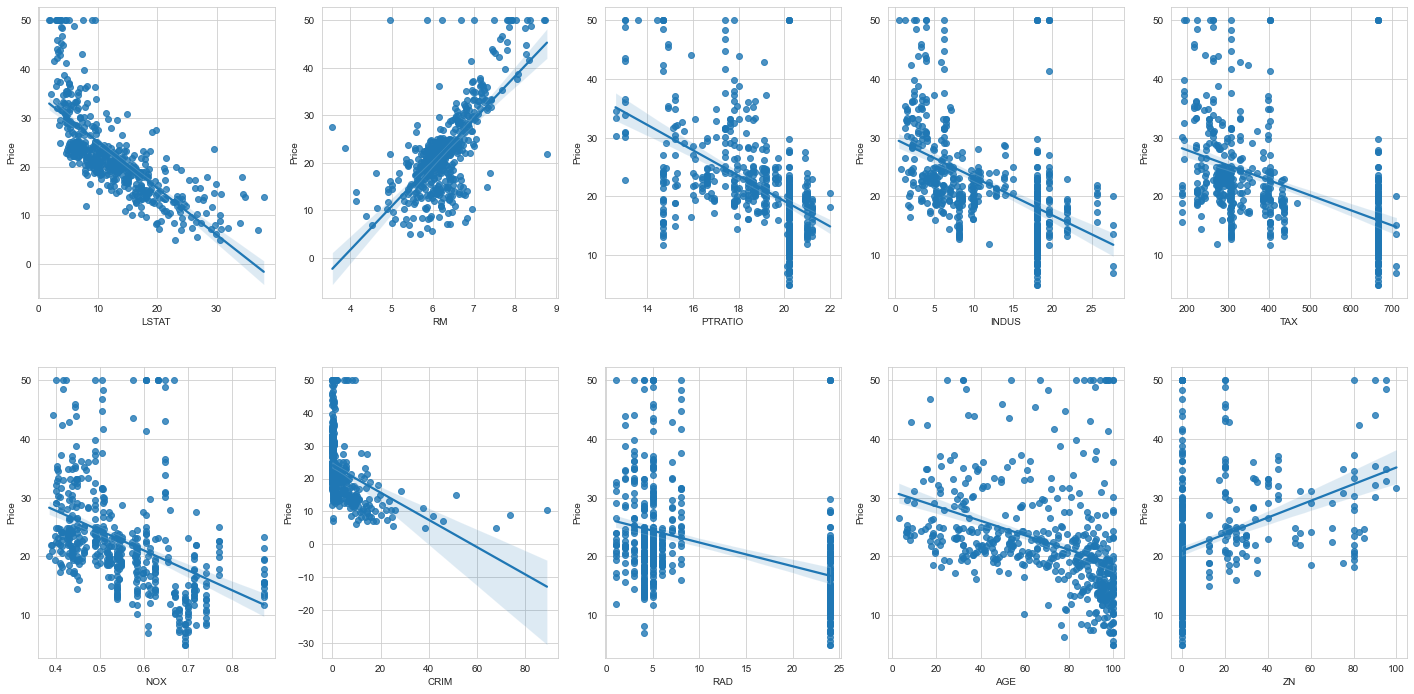

In [346]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(idx_largest_corr):
    sns.regplot(data = df, x = k, y = 'Price', ax=axs[i])
    #sns.scatterplot(data = df, x = k, y = 'Price', hue="CHAS", ax = axs[i])
plt.tight_layout(pad=2, w_pad=1, h_pad=4)

<p style="color:red;">what is interesting?!

Some features have a unique behaviour:
* Price trends upwards with ZN but also for ZN = 0 the entire price range is exhibited.
* Areas with zero crime can range in price from the minimum range to the maximum, but those with crime > 10 are exclusively low price.
* LSTAT correlates strongly with the price with what seems like a logarithmic relation.
* RM correlates strongly with the price.
* Price generally trends down with age and nox emissions.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

<p style="color:red;">
    Given no additional information, we need to know all possible outputs to to define the distribution and also all their probabilities (-1 because we have a constraint on the sum of probabilities). 
    which means we need (2n-1) + (2m-1) + (2k-1) parameters.
    The joint distribution is defined by the same amount of parameters. 

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

<p style="color:red;">
    Same answer. Knowing they are independent does not provide with additional constraints

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.
##### Method 1: Graphic
We will plot the data density distribution along with the 3 underlying PDFs. We will attempt to graphically match the two by tweaking the parameters until a satisfactory result is achieved. Finally we will plot the resulting gaussian mix.

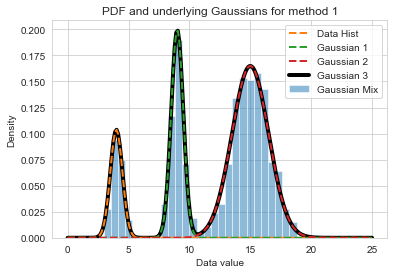

The resulting weights are: [0.13 0.25 0.62]  and the means: [ 4  9 15]


In [5]:
#Import data and plot
GMD_df = pd.read_csv('GMD.csv', header=None, index_col =[0], names = ['Data'])
plt.hist(GMD_df, 30, density=True, alpha=0.5)


#manually tweak the parameters
w1 = np.array([0.375, 0.25, 0.62])
w1[0] = 1.0-w1[1]-w1[2] #enforce weight size
mu1 = np.array([4, 9, 15])
sigma1 = [0.5, 0.5, 1.5]

#plot resulting weighted PDFs
data_range = np.linspace(0,25,200)
GMD1 = np.zeros((200,))
for i in range(3):
    gaussian_i = w1[i]*stats.norm.pdf(data_range, loc = mu1[i], scale = sigma1[i])
    plt.plot(data_range, gaussian_i, '--', linewidth = 2, zorder = 4);
    GMD1 += gaussian_i

#plot resulting gaussian mixture
plt.plot(data_range, GMD1,'k', linewidth = 4, zorder = 2);
plt.legend(['Data Hist','Gaussian 1','Gaussian 2','Gaussian 3','Gaussian Mix']);
plt.title('PDF and underlying Gaussians for method 1')
plt.xlabel('Data value')
plt.ylabel('Density')
plt.show();

print('The resulting weights are:', w1, ' and the means:', mu1)

Using Method 1 we can estimate $\mu_3 = 15, w_1 = 0.13, w_3 = 0.62$.

##### Method 2: Analytic
We have to find $w_1, w_3$ and $\mu_3$. First, lets recall that all weights should sum to one:

$\Sigma w_i = w_1 + 0.25 + w_3 = 1 \rightarrow w_1 = 0.75-w_3$.

Next we can compute the variance and mean of the data:

In [14]:
print('Variance: ', round(GMD_df.Data.var(), 3), 'Mean: ', round(GMD_df.Data.mean(), 3))

Variance:  17.591 Mean:  12.199


Comparing the mean with the empirical one,

$\mu = \Sigma \mu_i k_i = 4w_1+9\times0.25+\mu_3 w_3 = 12.199 \rightarrow w_3 = \frac{6.949}{m_3-4}$

We have seen in class that the variance of the gaussian mixture relates to the variance of the underlying mixtures by:
<p style="color:red;"> this is different from the magic intergnet formula

$Var(GMD) = \Sigma_iw_iE((X_i-\mu_i)^2) + \Sigma_iw_i(\mu_i-\mu)^2 = \Sigma_iw_i\sigma_i^2+\Sigma_iw_i(\mu_i-\mu)^2=$
$=  w_1\times0.5^2+0.25\times0.5^2+w_3\times1.5+w_1\times(4-12.199)^2+0.5\times(9-12.199)^2+w_3\times(\mu_3-12.199)^2$

Plugging the computed variance:

$17.591 = 67.47w_1 + 10.296w_2+w_3(\mu_3-12.199)^2$

And plugging the expressions for $w_1, w_3$:

$17.591 = 67.47(0.75-w_3) + 10.296w_2+w_3(\mu_3-12.199)^2$



##### Method 3: EM
We will utilize the EM algorithm in the sklearn.mixture library. Since we cannot force $\mu, \sigma$ or $w$ the result will be approximately close to the requirements in the question. Therefore the resulting $\mu_3$ and $w_1, w_3$ will be approximate.

In [4]:
#Initialize
means_initial_guess = np.array([[4], [9], [15]])
weights_initial_guess = np.array([0.15, 0.25, 0.6])

#Use EM with the initial guess
GMD2 = mixture.GaussianMixture(n_components = 3, covariance_type = 'full',
                               means_init = means_initial_guess, 
                               weights_init = weights_initial_guess).fit(GMD_df)

print('The resulting weights are:', np.round(GMD2.weights_, 3), ' and the means:', np.round(GMD2.means_.reshape(3,), 3))

The resulting weights are: [0.125 0.25  0.625]  and the means: [ 4.084  8.998 15.104]


Using this approach we can estimate $\mu_3 = 15.104, w_1 = 0.125, w_3 = 0.625$.
<p style="color:red;"> Cannot enforce the mu and sigma conditions

<p style="color:red;">
    - 1) chi2 minimization (we have 3 unknown parameters) 
   

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

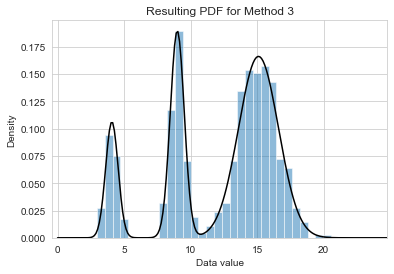

In [76]:
#Plot the Data histogram
plt.hist(GMD_df, 30, density=True, alpha=0.5)

#Plot the PDF
pdf = np.exp(GMD2.score_samples(data_range.reshape(-1, 1)))
plt.plot(data_range, pdf, '-k')

#Change to range of mu +- 3sigma
plt.xlim([GMD_df.Data.mean()-3*GMD_df.Data.std(), GMD_df.Data.mean()+3*GMD_df.Data.std()])
plt.title('Resulting PDF for Method 3')
plt.xlabel('Data value')
plt.ylabel('Density')
plt.show()

We have plotted the PDF within the limits of $\mu-3\sigma$ and $\mu+3\sigma$ which is the usual analysis range for a gaussian (or gaussian-like in this case) function.

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

* Using method 1 (manual \ graphic) will be possible but very inaccurate and tedious without further information on the 4th gaussian.
* Using method 2 (analytic computation) will not be possible. Increasing to k = 4 adds three more parameters to be estimated ($\mu_4, w_4, \sigma_4$) and with no addtional information \ equations it will not be possible to estimate them.
* Using method 3 (EM) with k = 4 is possible.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

###### Approach 1:
Suppose we want to generate N values into an empty array.
1. Create 3 normal distributions with the parameters $\mu_i, \sigma_i$.
2. Draw a random integer $n$ with uniform probability between 1..3.
3. If $n = 1$, draw from distribution $i = 1$, if $n = 2$ from 2, etc. This is because the distributions all have identical weights.
4. Add the resulting value to array of results.
5. Repeat 2-4 N times.

##### Approach 2:
Suppose we require N samples, and $N % 3 = 0$.
1. Create 3 normal distributions with the parameters $\mu_i, \sigma_i$.
2. Draw $\frac{N}{3}$ results from distribution 1.
3. Repeat 2 for $i = 2,3$ while drawing $\frac{N}{3}$ from each distribution.

The resulting vector will have N samples equally weighted between distributions.
#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc).


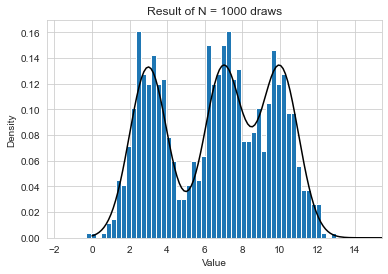

In [143]:
#plug in parameters. Each row (mu, sigma) is a gaussian
norm_params = [[3, 1], [7, 1], [10, 1]]
w = np.array([1/3, 1/3, 1/3])
N = 1000

#set normal distributions
np.random.seed(2)
mixture_idx = np.random.choice(3, size = N, p = w)
draw1 = np.fromiter((stats.norm.rvs(*(norm_params[i])) for i in mixture_idx),dtype=np.float64)

#draw histogram of result
plt.hist(draw1, density=True, bins=50);

#draw also the theoretical PDF
draw2 = np.zeros((200,))
for i in range(3):
    draw2 += w[i]*stats.norm.pdf(data_range, loc = norm_params[i][0], scale = norm_params[i][1])
plt.plot(data_range, draw2, '-k')
    
#Change to range of mu +- 3sigma
plt.xlim([draw1.mean()-3*draw1.std(), draw1.mean()+3*draw1.std()])
plt.title('Result of N = 1000 draws')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

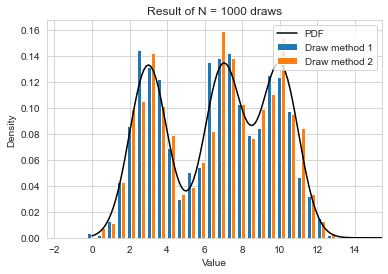

In [174]:
#vector of draw indices
mixture_idx = np.array([0]*int(N/3)+[1]*int(N/3)+[2]*int(N/3+1))
draw3 = np.fromiter((stats.norm.rvs(*(norm_params[i])) for i in mixture_idx),dtype=np.float64)

#draw all
draw4 = np.stack((draw1, draw3),axis=1)
plt.hist(draw4, 25, density=True)
plt.plot(data_range, draw2, '-k')

#Change to range of mu +- 3sigma

plt.xlim([draw1.mean()-3*draw1.std(), draw1.mean()+3*draw1.std()])
plt.title('Result of N = 1000 draws')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['PDF','Draw method 1','Draw method 2'])
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [ ]:
stats.norm(loc=75000,?=37500).cdf(50_000)

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [ ]:
(stats.norm(loc=75000,?=37500).cdf(65_000) - stats.norm(loc=75000,?=37500).cdf(45_000))*100

#### 4.C
What percent of people earn more than 85,000 RCU?

In [ ]:
1-stats.norm(loc=75000,?=37500).cdf(85_000)

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [ ]:
(1-stats.norm(loc=75000,?=37500).cdf(140_000)) * 1000

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### 5.B
Write code to compute the exact value of $V(T_{N})$

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$